In [83]:
from pathlib import Path
import anndata as ad
import scanpy as sc
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import sys
# stimage custom 
file = Path("/scratch/imb/Xiao/STimage/stimage").resolve() # path to src code
parent = file.parent
sys.path.append(str(parent))

from tqdm import tqdm

from stimage._utils import gene_plot

import pickle
import stlearn as st

# from scipy.stats import zscore
# from sklearn.preprocessing import Binarizer
# from sklearn.metrics import jaccard_score, accuracy_score, f1_score, roc_auc_score

# from skimage.filters import threshold_otsu, threshold_multiotsu
# import multiprocessing as mp


In [16]:
# Wiener
BASE_PATH = Path('/scratch/imb/Xiao/')
PRED_PATH = BASE_PATH / 'STimage/development/TCGA_test'
ANNO_PATH = BASE_PATH / 'Q2051/STimage_project/STimage_dataset/RAW/TCGA_annotation_2'
OUT_PATH = PRED_PATH / "PLOTS"
OUT_PATH.mkdir(parents=True, exist_ok=True)

In [4]:
SAMPLE = "TCGA-BH-A0C7-01B-01-TSA.deec957f-1264-4169-945e-24d4bd1988cd"

In [67]:
adata = ad.read_h5ad(PRED_PATH / f"pred_{SAMPLE}.h5ad")

In [68]:
adata.uns["spatial"]['TCGA_svs']['images'].keys()

dict_keys(['fulres'])

In [70]:
adata.obs["imagerow"] = adata.obsm["spatial"][:,0] //10
adata.obs["imagecol"] = adata.obsm["spatial"][:,1] //10


In [71]:
adata.obsm["spatial"][:, [0, 1]]  = adata.obsm["spatial"][:, [1, 0]]

In [72]:
img = Image.fromarray(adata.uns["spatial"]['TCGA_svs']['images']['fulres'])
img = img.resize((img.size[0]//10, img.size[1]//10))

In [73]:
img.size

(4500, 1537)

In [74]:
adata.uns["spatial"]['TCGA_svs']['scalefactors'] = {}
adata.uns["spatial"]['TCGA_svs']['metadata'] = {}
adata.uns["spatial"]['TCGA_svs']['use_quality'] = "hires"
adata.uns["spatial"]['TCGA_svs']['scalefactors']["tissue_hires_scalef"] = 0.1
adata.uns["spatial"]['TCGA_svs']['scalefactors']["fiducial_diameter_fullres"] = 10
adata.uns["spatial"]['TCGA_svs']['scalefactors']["spot_diameter_fullres"] = 10
adata.uns["spatial"]['TCGA_svs']['images']['hires'] = np.array(img)

In [79]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.louvain(adata, resolution=0.4, key_added="clusters")


In [82]:
?sc.pl.umap

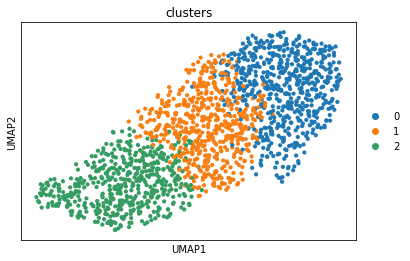

In [102]:
# fig, ax = plt.subplots()
fig_ = sc.pl.umap(adata, color=["clusters"], return_fig=True)
fig_.savefig(OUT_PATH / f"umap_{SAMPLE}.pdf", dpi=300)


In [105]:
?st.pl.cluster_plot

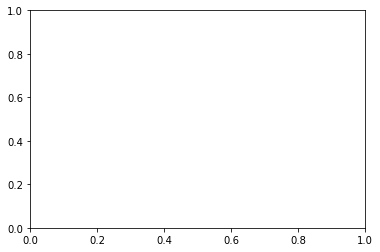

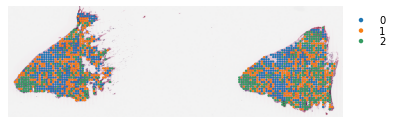

In [106]:
fig, ax = plt.subplots()
st.pl.cluster_plot(adata, use_label = "clusters", ax=ax)
plt.savefig(OUT_PATH / f"cluster_{SAMPLE}.pdf", dpi=300)

In [20]:
adata.obsm["spatial"]

array([[ 1196,  9269],
       [ 1196,  9568],
       [ 1196,  9867],
       ...,
       [13754, 39169],
       [13754, 39468],
       [13754, 42458]])

In [21]:
adata.uns["spatial"]

{'TCGA_svs': {'images': {'fulres': array([[[243, 243, 243],
           [243, 243, 243],
           [243, 243, 243],
           ...,
           [244, 244, 244],
           [245, 245, 245],
           [243, 243, 243]],
   
          [[243, 243, 243],
           [243, 243, 243],
           [243, 243, 243],
           ...,
           [244, 244, 244],
           [245, 245, 245],
           [243, 243, 243]],
   
          [[243, 243, 243],
           [243, 243, 243],
           [243, 243, 243],
           ...,
           [244, 244, 244],
           [245, 245, 245],
           [243, 243, 243]],
   
          ...,
   
          [[243, 245, 243],
           [243, 245, 243],
           [243, 245, 243],
           ...,
           [244, 245, 243],
           [241, 244, 243],
           [241, 243, 243]],
   
          [[243, 246, 243],
           [243, 246, 243],
           [243, 246, 243],
           ...,
           [242, 245, 243],
           [238, 243, 243],
           [239, 243, 243]],
   
    